In [1]:
from torch_geometric.data import Dataset
import xml.etree.ElementTree as ET
from torch_geometric.data import Data
import torch
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('../evsim'))
from classes.matsim_xml_dataset import MatsimXMLDataset

In [2]:
network_xml_path = "/home/isaacp/repos/EvMatsim/contribs/ev/script_scenarios/utahevscenario/utahevnetwork.xml"
charger_xml_path = "/home/isaacp/repos/EvMatsim/contribs/ev/script_scenarios/utahevscenario/utahevchargers.xml"
charger_dict = {
    "none": 0,
    # in matsim the default charger is a static charger we could update this dictionary
    # to include different charger types along with charger cost and other attributes
    # the graph uses this dictionary to map the charger type to an integer
    "default": 1,
    "dynamic": 2
}
dataset = MatsimXMLDataset(network_xml_path, charger_xml_path, charger_dict)
graph : Data = dataset.get_graph()

In [3]:
print(graph)

Data(x=[25170, 1], pos=[25170, 2], edge_index=[2, 33848], edge_attr=[33848, 8])


In [4]:
charger_type = graph.edge_attr[:, 5:]
print(charger_type.shape)

torch.Size([33848, 3])


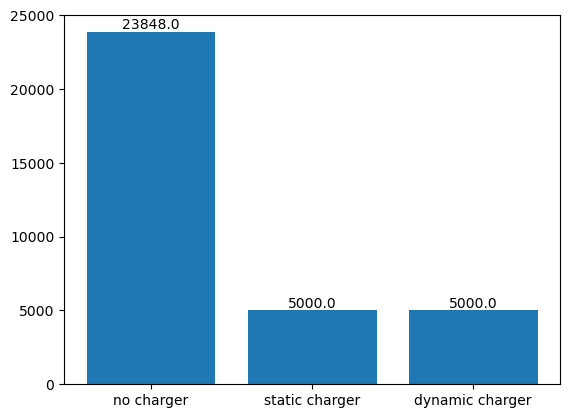

In [5]:
values = [torch.sum(charger_type[:,0]),
         torch.sum(charger_type[:,1]),
         torch.sum(charger_type[:,2])]
plt.bar(x=['no charger', 'static charger', 'dynamic charger'], height=values)

for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value.item()), ha='center', va='bottom')

In [6]:
print(dataset.edge_attr_mapping)

{'length': 0, 'freespeed': 1, 'capacity': 2, 'permlanes': 3, 'oneway': 4, 'none': 5, 'default': 6, 'dynamic': 7}


In [10]:
for attr, idx in dataset.edge_attr_mapping.items():
    vals = graph.edge_attr[:, idx]

    print(f'{attr}: maxval = {torch.max(vals)}, minval = {torch.min(vals)}')

length: maxval = 5700.04345703125, minval = 0.211056649684906
freespeed: maxval = 35.75555419921875, minval = 8.938888549804688
capacity: maxval = 18000.0, minval = 1500.0
permlanes: maxval = 12.0, minval = 1.0
oneway: maxval = 1.0, minval = 1.0
none: maxval = 1.0, minval = 0.0
default: maxval = 1.0, minval = 0.0
dynamic: maxval = 1.0, minval = 0.0
